# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # Ignore warning

pd.set_option('float_format', '{:2f}'.format) # Show full number instead of show number like "1.5e2"


## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
df = pd.read_csv('data\\titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S


## Data Cleaning



### Missing data:

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

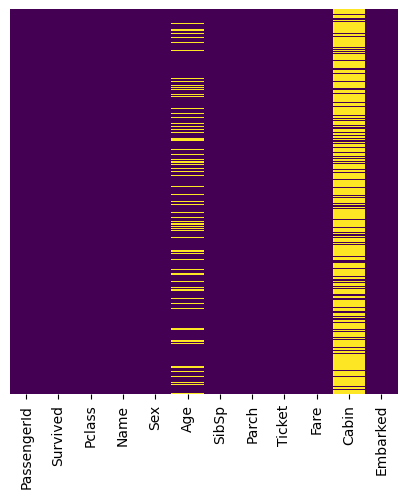

In [5]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [6]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.000000,1,1,11751,52.554200,D35,S
444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.112500,NaN,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.000000,1,1,110413,79.650000,E67,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000000,0,0,350406,7.854200,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.000000,1,2,SC/Paris 2123,41.579200,NaN,C


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"


We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

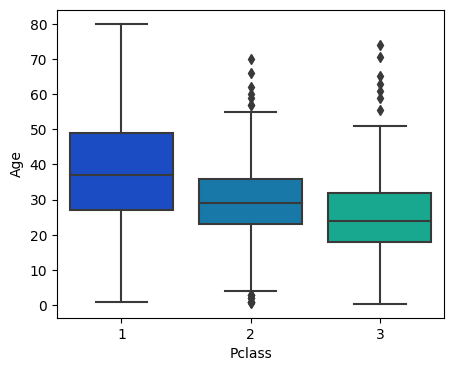

In [7]:
plt.figure(figsize=(5, 4))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')
plt.show()

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these median age values to impute based on Pclass for Age.

In [8]:
# get mean of age each pclass:
median1 = df[df['Pclass'] == 1]['Age'].median()
median2 = df[df['Pclass'] == 2]['Age'].median()
median3 = df[df['Pclass'] == 3]['Age'].median()

median1, median2, median3


(37.0, 29.0, 24.0)

In [9]:
def impute_age(r):
    if pd.isnull(r['Age']):
        if r['Pclass'] == 1:
            return median1
        elif r['Pclass'] == 2:
            return median2
        else:
            return median3
    else:
        return r['Age']

Now apply that function!

In [10]:
df['Age'] = df.apply(impute_age,axis=1)

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now let's check that heat map again!

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [12]:
df.drop(columns='Cabin', inplace=True)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,S


In [14]:
# Drop remaining NA values:
df.dropna(inplace=True)

In [15]:
df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## EDA:


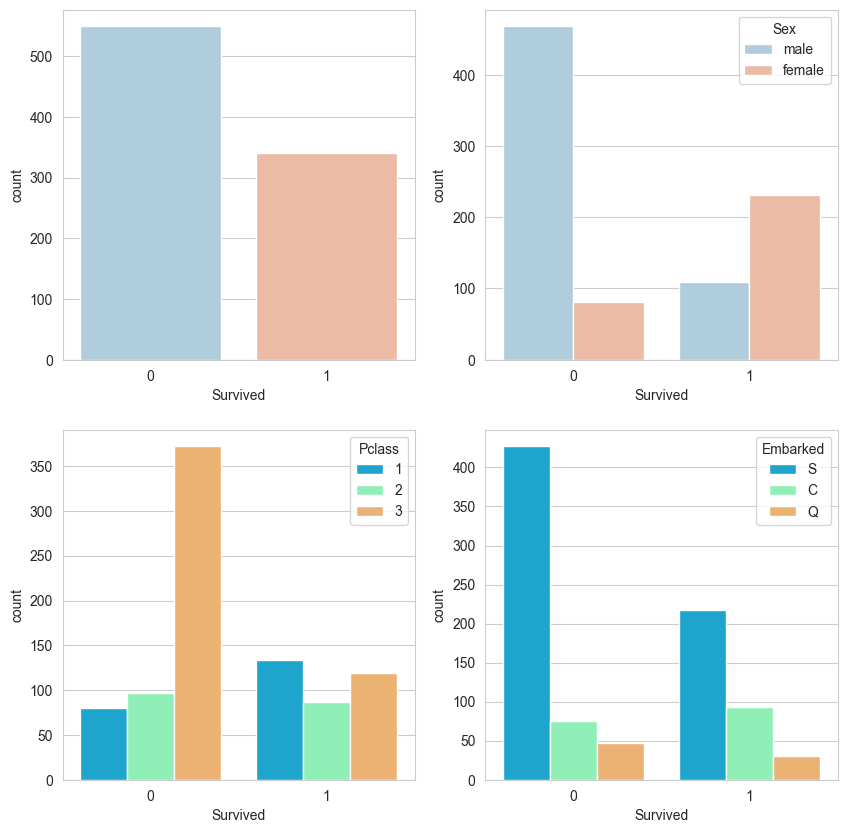

In [16]:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')

plt.subplot(221)
sns.countplot(x='Survived',data=df,palette='RdBu_r')

plt.subplot(222)
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

plt.subplot(223)
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

plt.subplot(224)
sns.countplot(x='Survived',hue='Embarked',data=df,palette='rainbow')

plt.show()

## Transforming data


### Transforming categorical data

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,S


👉 Field 'sex': assigning male: 1; female: 0

In [18]:
df.loc[df['Sex'] == 'male', 'Sex'] = 1
df.loc[df['Sex'] == 'female', 'Sex'] = 0


In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.250000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.283300,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.925000,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.100000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.050000,S


👉 Field 'Embarked': using 'get_dummy' (or OneHotEncoder)

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
# Use ordinal encoder to 
oh_encoder = OneHotEncoder(sparse_output=False)
embarked_enc = oh_encoder.fit_transform(df[['Embarked']])
embarked_enc[:5]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [22]:
# Using pd.get_dummies()
embark = pd.get_dummies(df['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


👉 Drop unnecessary columns: `PassengerId`, `Name`, `Ticket`, `Embarked`

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.250000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.283300,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.925000,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.100000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.050000,S


In [24]:
# Drop unnecessary columns:
df.drop(columns=['PassengerId','Embarked','Name','Ticket'], inplace=True)

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.250000
1,1,1,0,38.000000,1,0,71.283300
2,1,3,0,26.000000,0,0,7.925000
3,1,1,0,35.000000,1,0,53.100000
4,0,3,1,35.000000,0,0,8.050000


👉 Combine with transformed data:

In [26]:
df2 = pd.concat([df, embark], axis=1)
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.000000,1,0,7.250000,0,0,1
1,1,1,0,38.000000,1,0,71.283300,1,0,0
2,1,3,0,26.000000,0,0,7.925000,0,0,1
3,1,1,0,35.000000,1,0,53.100000,0,0,1
4,0,3,1,35.000000,0,0,8.050000,0,0,1


😉 Great! Our data is ready for our model!

# Building a Logistic Regression model



<img src="https://www.saedsayad.com/images/LogReg_1.png" width="600">


+ Similar to linear regression, `logistic regression` is also used to` estimate the relationship between a dependent variable` and `one or more independent variables`, but it is used to make a prediction about a `categorical variable` versus a continuous one. A categorical variable can be true or false, yes or no, 1 or 0, et cetera. The unit of measure also differs from linear regression as `it produces a probability`, but the logit function transforms the S-curve into straight line.

+ As default, Sklearn Logistic Regression uses 0.5 as the threshold to classify classes

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns='Survived'), 
                                                    df2['Survived'], 
                                                    test_size=0.30, 
                                                    random_state=101)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((622, 9), (622,), (267, 9), (267,))

## Training and Predicting

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [31]:
# make prediction and return result as label:
y_train_pred = logmodel.predict(X_train)
y_test_pred = logmodel.predict(X_test)

# Make prediction and return result as probability:
y_train_pred_prop = logmodel.predict_proba(X_train)
y_test_pred_prop = logmodel.predict_proba(X_test)



In [32]:
# Let's take a look in our results:
print('Result of ".predict(X_train)":', y_train_pred[:5], sep = '\n')
print('=='*30)
print('Result of ".predict_proba(X_train)":', y_train_pred_prop[:5], sep = '\n')


Result of ".predict(X_train)":
[1 1 1 0 0]
Result of ".predict_proba(X_train)":
[[0.3408896  0.6591104 ]
 [0.16870863 0.83129137]
 [0.41213181 0.58786819]
 [0.5985339  0.4014661 ]
 [0.86392717 0.13607283]]


In [33]:
train_res = pd.DataFrame([y_train.values, y_train_pred, y_train_pred_prop]).T
train_res.columns = ['y_train', 'y_train_pred', 'predict probability']
train_res.head(10)

,y_train,y_train_pred,predict probability
0,0,1,"[0.3408895974348578, 0.6591104025651422]"
1,1,1,"[0.16870863269337477, 0.8312913673066252]"
2,1,1,"[0.41213180940288074, 0.5878681905971193]"
3,1,0,"[0.5985338980027586, 0.4014661019972415]"
4,0,0,"[0.8639271730358861, 0.1360728269641139]"
5,0,1,"[0.4992616803717732, 0.5007383196282268]"
6,1,1,"[0.027451493486071676, 0.9725485065139283]"
7,1,1,"[0.271438214048362, 0.728561785951638]"
8,0,1,"[0.39401819958891215, 0.6059818004110878]"
9,1,1,"[0.09198214505097058, 0.9080178549490294]"


### How to change threshold?

In [34]:
y_train_pred_prop[:5]


array([[0.3408896 , 0.6591104 ],
       [0.16870863, 0.83129137],
       [0.41213181, 0.58786819],
       [0.5985339 , 0.4014661 ],
       [0.86392717, 0.13607283]])

In [35]:
y_train_pred[:5]


array([1, 1, 1, 0, 0], dtype=int64)

In [36]:
# If you want to change threshold to 0.7:
(y_train_pred_prop>=0.7).astype('int')[:5]

array([[0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 0]])

In [37]:
# Get prediction label with the new threshold 0.7:
y_train_pred2 = (y_train_pred_prop>=0.7).astype('int')[:, 1]
y_train_pred2[:5]

array([0, 1, 0, 0, 0])

Let's move on to evaluate our model!

## Model Evaluation Metrics:

In [47]:
# Import evaluation metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report, ConfusionMatrixDisplay

### 👉 Accuracy metrics
The ratio between the number of correctly predicted points and the total number of points in the data set. 

It's simple! Right :))

In [39]:
# Accuracy on trainset:
accuracy_score(y_train, y_train_pred)

0.8070739549839229

In [40]:
# Accuracy on testset:
accuracy_score(y_test, y_test_pred)

0.8239700374531835

### 👉 Confusion Matrix

In [41]:
# Calculating non-normalized confustion matrix on Testset:
confusion_matrix(y_test, y_test_pred)

array([[149,  14],
       [ 33,  71]], dtype=int64)

In [60]:
# Normalized confustion matrix on Testset
confusion_matrix(y_test, y_test_pred, normalize='true')


array([[0.91411043, 0.08588957],
       [0.31730769, 0.68269231]])

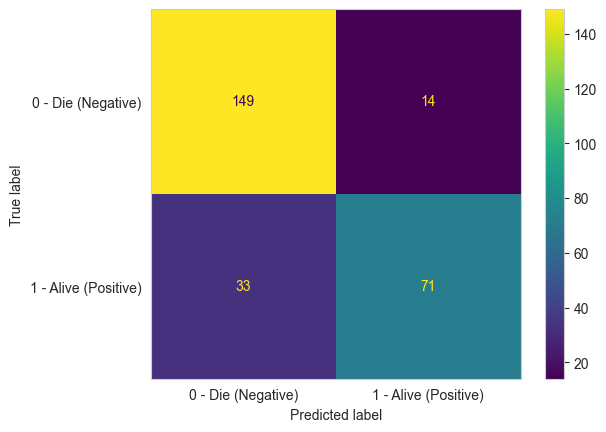

In [77]:
# Plot non-normalized confusion matrix
non_norm_cm = confusion_matrix(y_test, y_test_pred)
cfdisplay = ConfusionMatrixDisplay(non_norm_cm, display_labels=['0 - Die (Negative)','1 - Alive (Positive)'])
cfdisplay.plot()
plt.grid(False)

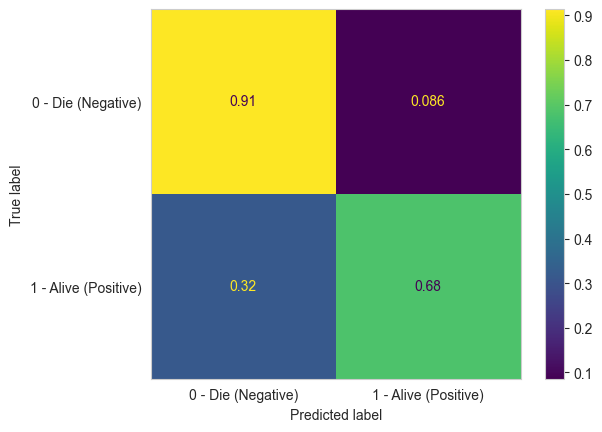

In [80]:
# Plot normalized confusion matrix
norm_cm = confusion_matrix(y_test, y_test_pred, normalize='true')
cfdisplay = ConfusionMatrixDisplay(norm_cm, display_labels=['0 - Die (Negative)','1 - Alive (Positive)'])
cfdisplay.plot()
plt.grid(False)

👉 **Type 1 and Type 2 errors**

![alt text](https://www.statisticssolutions.com/wp-content/uploads/2017/12/rachnovblog.jpg)

source: https://www.statisticssolutions.com/to-err-is-human-what-are-type-i-and-ii-errors/

**Type 1 error** is also known as False Positive, or FP (predict Positive, but actual label is Negative)

**Type 2 error** is also known as False Negative, or FN (predict Negative, but actual label is Positive)

Given a list of **binary classification** problems below, determine which type of error we should avoid for each of the problem
- Covid (or other Diseases) test prediction (with Covid is assigned to 1): `type 2 (FN)`
- Fraud detection (with "Is fraud" is assigned to 1): `type 2 (FN)`
- Email spam filter (with "Is_spam" is assigned to 1): `type 1 (FP)`
- Predicting potential students in school (with "Is_good_student" is assigned to 1): `type 1 (FP)`

### Terminologies

**Recall, sensitivity, hit rate, or true positive rate(TPR)**: là tỉ lệ số điểm true positive trong số những điểm thực sự là positive (TP + FN). Hay nói cách khác là tỉ lệ model dự đoán đúng là Positive (1) trên tổng số thực tế Positive (1) của data

Để tăng Recall ta cần giảm FN, tức là giảm Type 2 error


$$
TPR = \frac{TP}{P} = \frac{TP}{TP + FN}
$$

**precision or positive predictive value (PPV)**: là tỉ lệ số điểm true positive trong số những điểm được phân loại là positive của model (TP + FP). Hay nói cách khác là tỉ lệ model dự đoán đúng là Positive (1) trên tổng số dự đoán là Positive (1) của model 

Để tăng Precision ta cần giảm FP, tức là giảm Type 1 error

$$
PPV = \frac{TP}{TP + FP}
$$


**F1 score**: the **harmonic mean** of **precision** and **recall**

$$
F_1 = 2 \frac{Precision . Recall}{Precision + Recall}
$$


We can check `precision`, `recall`, `f1-score` using `classification report`!

In [82]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



🤔 Note: If you curious about `macro avg` and `weight avg` and here is the answer:


+ In the case of **Weighted average** the performance metrics are weighted accordingly:

In [85]:
# Example Weight Avg. of recall (The same with Precision):
# (Percentage_of_positive)*Positive_Recall + (Percentage_of_Negative)*Negative_Recall

(104/267)*0.68 + (163/267)*0.91

0.8204119850187266

+ In the case of **Macro average** is just the **mean** of metrics of classes:

In [86]:
# Example Macro Avg. of recall (The same with Precision):
# (Positive_Recall + Negative_Recall)/2

(0.68 + 0.91)/2

0.795